In [1]:
import pandas as pd
# import matplotlib_inline.pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import display
from utilities import sort_suppliers_by_service_area, total_expenses_per_supplier, total_expenses

%matplotlib inline

# pd.options.display.max_rows = 2000

df = pd.read_csv('resources/sanitised-data.csv')
df.reset_index()
display(df)

,Body Name,Service Area,Expense Type,Invoice Payment Date,Transaction Number,Net Amount,Supplier Name
0,TfGM,Transport,Planning Support Services,03/04/2023,5100184107,"8,869.30",AECOM LTD
1,TfGM,Transport,Planning Support Services,03/04/2023,5100185084,"1,000.00",AECOM LTD
2,TfGM,Transport,Driver Intervention Course Delivery Costs,03/04/2023,1900087630,"2,011.97",AKHTAR HUSSAIN
3,TfGM,Transport,Driver Intervention Course Delivery Costs,03/04/2023,1900087629,"1,261.10",ALAN HOLT
4,TfGM,Transport,Capital Costs - Design Support Services,03/04/2023,5100185013,"2,255.00",AMEY MAP SERVICES LTD
...,...,...,...,...,...,...,...
4378,TfGM,Transport,Capital Costs - Programme and Project Manageme...,30/06/2023,5100189406,"2,586.20",REAL STAFFING GROUP
4379,TfGM,Transport,Smart Ticketing,30/06/2023,5100189409,"2,500.00",REAL STAFFING GROUP
4380,TfGM,Transport,Capital Costs - Programme and Project Manageme...,30/06/2023,5100189410,"2,941.20",REAL STAFFING GROUP
4381,TfGM,Transport,Smart Ticketing,30/06/2023,5100189411,"2,068.96",REAL STAFFING GROUP


So, let's start on my journey of data science. I was interested in exactly who money was going to over this quarter and what service they were contracted by. I created a function in my utilities to sort 

In [2]:
suppliers = sort_suppliers_by_service_area(df)

expenses_per_supplier = {"Supplier": [], "Service": [], "Expense": []}
for service in suppliers.keys():
    for supplier in suppliers[service]:
        expenses_per_supplier["Supplier"].append(supplier)
        expenses_per_supplier["Service"].append(service)
        expenses_per_supplier["Expense"].append(total_expenses_per_supplier(df, supplier))

suppliers_and_expenses_df = pd.DataFrame.from_dict(expenses_per_supplier)
display(suppliers_and_expenses_df)


,Supplier,Service,Expense
0,AECOM LTD,Transport,324579.08
1,AKHTAR HUSSAIN,Transport,5888.72
2,ALAN HOLT,Transport,3793.10
3,AMEY MAP SERVICES LTD,Transport,619137.65
4,ANDREW MCPHERSON,Transport,3676.53
...,...,...,...
453,SATISNET LIMITED,Corporate Services,2779.80
454,USECURE LIMITED,Corporate Services,787.50
455,COALESCENT LIMITED,Corporate Services,9880.00
456,Barclays,Corporate Services,1998.08


And in order of most expensive to least. This data has some entries that were under £500, which I can segregate out to another data frame.

In [3]:
suppliers_sorted_by_expense = suppliers_and_expenses_df.sort_values(by="Expense", ascending=False)
suppliers_sorted_by_expense.reset_index()
display(suppliers_sorted_by_expense)

,Supplier,Service,Expense
43,KEOLIS AMEY METROLINK LTD,Transport,33783820.04
197,WILLMOTT DIXON CONSTRUCTION LIMITED,Transport,18627881.39
66,STAGECOACH SERVICES LTD,Transport,15183586.77
231,ALEXANDER DENNIS LTD,Transport,11358750.00
130,GO NORTH WEST LTD,Transport,7748203.10
...,...,...,...
347,CLEANING MACHINE SUPPORT LTD,Transport,490.00
302,LOW CARBON VEHICLE PARTNERSHIP,Transport,468.00
361,STORMSAVER LTD,Transport,452.28
349,LANGUAGE LINE,Transport,449.25


total expenses: 143810613.71000022 

KEOLIS AMEY METROLINK LTD: 33783820.04
WILLMOTT DIXON CONSTRUCTION LIMITED: 18627881.39
STAGECOACH SERVICES LTD: 15183586.770000001
ALEXANDER DENNIS LTD: 11358750.0
GO NORTH WEST LTD: 7748203.1
DIAMOND BUS NORTH WEST LTD: 5024386.66
FIRST MANCHESTER: 3524096.35
NPOWER LTD: 2867918.7599999984
ARTHUR J GALLAGHER INSURANCE BROKER: 2624594.1799999997
MANCHESTER CITY COUNCIL: 2594553.97


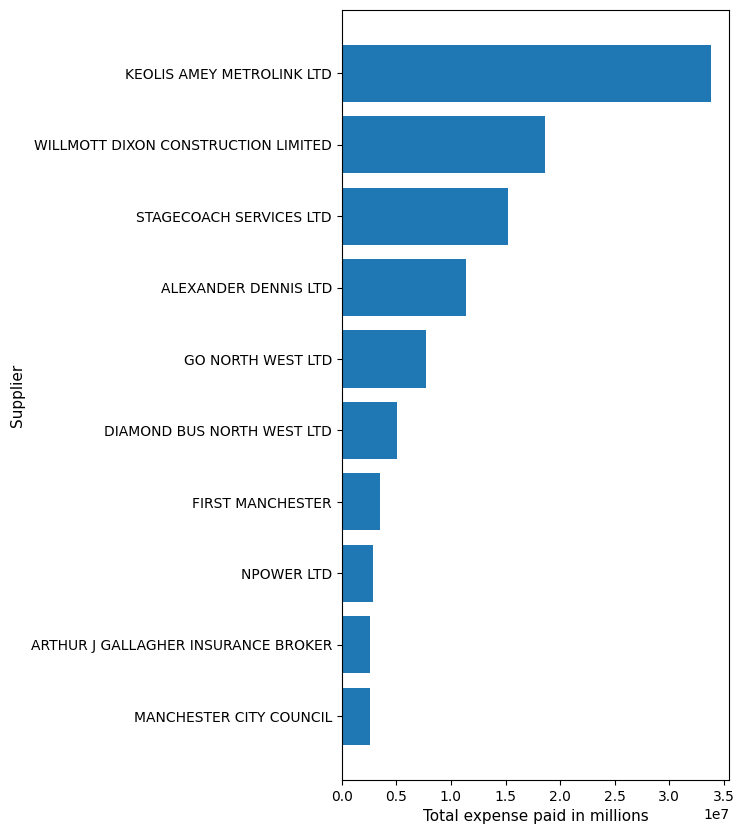

In [14]:
suppliers_list = []
expenses_list = []

plt.rcParams["figure.figsize"] = (5, 10)

# populate lists
i = 0
while i < 10:
    row = suppliers_sorted_by_expense.iloc[i]
    suppliers_list.append(row["Supplier"])
    expenses_list.append(row["Expense"])
    i += 1

# create map for easier reading while getting matplotlib to work
i = 0
suppliers_map = {}
while i < 10:
    suppliers_map[suppliers_list[i]] = expenses_list[i]
    i += 1

# print total expenses and top 10 supplier expenses
print(f"total expenses: {total_expenses(df)} \n")
for key in suppliers_map:
    print(f"{key}: {suppliers_map[key]}")

# plot ugly bar chart
plt.barh(suppliers_list, expenses_list)
plt.ylabel('Supplier', fontsize=11)
plt.xlabel('Total expense paid in millions', fontsize=11)
plt.gca().invert_yaxis()